# 합성곱 신경망(CNN)

## 1.1 Min-Max Normalization 데이터 정규화 작업

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [5]:
# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [7]:
# 데이터 갯수 확인하기
len(train_X), len(test_X), len(train_Y), len(test_Y)

(60000, 10000, 60000, 10000)

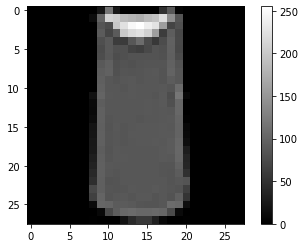

정답 범주:  0


In [12]:
# 이미지 확인하기
import matplotlib.pyplot as plt 
plt.imshow(train_X[2], cmap='gray')
plt.colorbar()
plt.show()

# 정답 범주 확인
print("정답 범주: ", train_Y[2])

In [14]:
# 데이터 정규화 이전의 이미지 픽셀 행렬

# print(train_X[2])

최소-최대 정규화(Min-Max Normalization)

- 데이터를 정규화하는 가장 일반적인 방법

- 모든 feature에 대해 각각의 최소값 0, 최대값 1

- 그리고 0과 1 사이의 값으로 변환


$$
\frac{(X - MIN)}{(MAX - MIN)} = \frac{X - 0}{(255 - 0)}
$$


In [15]:
# 최소-최대 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

In [17]:
# 확인하기

# train_X[2]